## Exploring The Telenor Telco Dataset

In [8]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
from datetime import datetime
from sklearn.metrics import f1_score, precision_score, recall_score
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import seaborn as sns
import cufflinks as cf
import glob
import sys
import json
from tqdm.notebook import tqdm
cf.go_offline()
init_notebook_mode


<function plotly.offline.offline.init_notebook_mode(connected=False)>

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Loading the data

In [11]:
data_path = '../../copenhagen_data/CPH_14.csv'
df = pd.read_csv(data_path, sep=",")
df.drop('Unnamed: 0', 1, inplace=True)


#data_path = '../../Data/Data_DK/radio_kpis_sample.csv'
#data_path = '../../Hackathon2021_Telenor/hackathon_kpis_anonymised.csv'
#df = pd.read_csv(data_path, sep=";")


df_orig = df.copy()

In [12]:
df_orig.head()

index      gid   site    sector cell_name              period_start_time  \
0     37  1251678  S3379  S3379Sx3  S3379S13  2020-09-11T22:00:00.000+02:00   
1     53  1252043  S3009  S3009Ux1  S3009U11  2020-09-16T01:00:00.000+02:00   
2     67  1246454  S3285  S3285Sx1  S3285S11  2020-10-16T22:00:00.000+02:00   
3    117  1257669  S0453  S0453Sx1  S0453S21  2019-11-03T07:00:00.000+01:00   
4    360  1257669  S0453  S0453Sx1  S0453S21  2019-11-03T06:00:00.000+01:00   

   day_partition_key  cell_hour tech  avail_period_duration  ...  mcdr_nom_s  \
0           20200911         22   3G                     60  ...         0.0   
1           20200916          1   3G                     60  ...         NaN   
2           20201016         22   3G                     60  ...         0.0   
3           20191103          7   3G                     60  ...         0.0   
4           20191103          6   3G                     60  ...         0.0   

   msdr_denom  msdr_nom_d  msdr_nom_s  thp_denom_tt_kpi  thp_nom_tt_kpi  \
0      3044.5         1.0         0.0         1426715.0       8229706.0   
1         NaN         NaN         NaN               0.0             0.0   
2      6518.5         0.0         1.0          430570.0       8957308.0   
3       107.0         0.0         0.0            4375.0      12223637.0   
4       142.0         1.0         2.0            6790.0       4023612.0   

   ho_denom  ho_nom  impact_denom  impact_nom  
0       0.0     0.0        3565.0        16.0  
1       NaN     NaN         474.0         6.0  
2       1.0     0.0        1366.0        16.0  
3       0.0     0.0           NaN         NaN  
4       0.0     0.0           NaN         NaN  

[5 rows x 27 columns]

### Some info
From below we see that we have 1048575 rows of data, each with 24 columns. 

In [13]:
print(df.shape)
df.head()

(4602880, 27)


index      gid   site    sector cell_name              period_start_time  \
0     37  1251678  S3379  S3379Sx3  S3379S13  2020-09-11T22:00:00.000+02:00   
1     53  1252043  S3009  S3009Ux1  S3009U11  2020-09-16T01:00:00.000+02:00   
2     67  1246454  S3285  S3285Sx1  S3285S11  2020-10-16T22:00:00.000+02:00   
3    117  1257669  S0453  S0453Sx1  S0453S21  2019-11-03T07:00:00.000+01:00   
4    360  1257669  S0453  S0453Sx1  S0453S21  2019-11-03T06:00:00.000+01:00   

   day_partition_key  cell_hour tech  avail_period_duration  ...  mcdr_nom_s  \
0           20200911         22   3G                     60  ...         0.0   
1           20200916          1   3G                     60  ...         NaN   
2           20201016         22   3G                     60  ...         0.0   
3           20191103          7   3G                     60  ...         0.0   
4           20191103          6   3G                     60  ...         0.0   

   msdr_denom  msdr_nom_d  msdr_nom_s  thp_denom_tt_kpi  thp_nom_tt_kpi  \
0      3044.5         1.0         0.0         1426715.0       8229706.0   
1         NaN         NaN         NaN               0.0             0.0   
2      6518.5         0.0         1.0          430570.0       8957308.0   
3       107.0         0.0         0.0            4375.0      12223637.0   
4       142.0         1.0         2.0            6790.0       4023612.0   

   ho_denom  ho_nom  impact_denom  impact_nom  
0       0.0     0.0        3565.0        16.0  
1       NaN     NaN         474.0         6.0  
2       1.0     0.0        1366.0        16.0  
3       0.0     0.0           NaN         NaN  
4       0.0     0.0           NaN         NaN  

[5 rows x 27 columns]

In [14]:
df.describe()

index           gid  day_partition_key     cell_hour  \
count  4.602880e+06  4.602880e+06       4.602880e+06  4.602880e+06   
mean   2.470123e+08  1.801695e+07       2.019912e+07  1.150014e+01   
std    1.425066e+08  2.533124e+07       3.509282e+03  6.921946e+00   
min    3.700000e+01  1.231122e+06       2.019110e+07  0.000000e+00   
25%    1.235864e+08  1.252271e+06       2.020020e+07  6.000000e+00   
50%    2.472434e+08  3.081880e+06       2.020052e+07  1.100000e+01   
75%    3.705012e+08  2.700613e+07       2.020091e+07  1.800000e+01   
max    4.936798e+08  1.233264e+08       2.020123e+07  2.300000e+01   

       avail_period_duration  unavail_unplan_nom  unavail_unplan_denom  \
count           4.602880e+06        4.602880e+06          4.602880e+06   
mean            5.995782e+01        5.488295e-02          5.990021e+01   
std             1.171396e+00        1.681571e+00          2.301096e+00   
min             1.000000e+00        0.000000e+00          0.000000e+00   
25%             6.000000e+01        0.000000e+00          6.000000e+01   
50%             6.000000e+01        0.000000e+00          6.000000e+01   
75%             6.000000e+01        0.000000e+00          6.000000e+01   
max             6.000000e+01        6.000000e+01          1.199833e+02   

       unavail_total_nom  unavail_total_denom     bandwidth  ...  \
count       4.602880e+06         4.602880e+06  4.602880e+06  ...   
mean        2.498589e+00         5.995247e+01  4.670243e+01  ...   
std         1.172985e+01         1.551509e+00  4.613056e+01  ...   
min        -5.998333e+01         1.000000e-01  1.000000e-01  ...   
25%         0.000000e+00         6.000000e+01  1.000000e+01  ...   
50%         0.000000e+00         6.000000e+01  2.000000e+01  ...   
75%         0.000000e+00         6.000000e+01  1.000000e+02  ...   
max         1.200000e+02         6.003333e+01  2.000000e+02  ...   

         mcdr_nom_s    msdr_denom    msdr_nom_d    msdr_nom_s  \
count  4.203557e+06  4.205716e+06  4.201165e+06  4.205716e+06   
mean   1.549735e-02  2.295438e+03  1.002810e+01  4.832599e+00   
std    1.557594e-01  3.903259e+03  4.181815e+01  3.522928e+01   
min   -2.000000e+00  0.000000e+00 -5.427000e+03 -7.000000e+00   
25%    0.000000e+00  4.135000e+02  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.089000e+03  1.000000e+00  0.000000e+00   
75%    0.000000e+00  2.792000e+03  6.000000e+00  2.000000e+00   
max    3.900000e+01  1.562940e+05  9.096000e+03  3.412100e+04   

       thp_denom_tt_kpi  thp_nom_tt_kpi      ho_denom        ho_nom  \
count      4.435470e+06    4.435470e+06  3.869860e+06  3.869860e+06   
mean       1.303532e+06    1.069816e+10  5.817515e+01  2.173049e+00   
std        3.676192e+06    2.415547e+10  1.463529e+02  4.538006e+01   
min        0.000000e+00    0.000000e+00  0.000000e+00 -3.000000e+00   
25%        2.891000e+03    5.319025e+04  0.000000e+00  0.000000e+00   
50%        8.719400e+04    7.143488e+07  2.000000e+00  0.000000e+00   
75%        1.013646e+06    1.049302e+10  5.100000e+01  0.000000e+00   
max        6.062864e+08    7.177878e+11  6.469000e+03  5.049000e+03   

       impact_denom    impact_nom  
count  1.781906e+06  1.781906e+06  
mean   1.273455e+03  7.943522e+00  
std    1.215631e+03  1.950345e+01  
min    1.000000e+00  0.000000e+00  
25%    4.120000e+02  1.000000e+00  
50%    8.690000e+02  4.000000e+00  
75%    1.708000e+03  9.000000e+00  
max    8.736000e+03  1.478000e+03  

[8 rows x 22 columns]

### Print number of nans for each column

In [15]:
nan_values = df.isna().sum()
print(nan_values)
nan_columns = nan_values[nan_values > 0].index.tolist()
nan_columns

index                          0
gid                            0
site                           0
sector                         0
cell_name                      0
period_start_time              0
day_partition_key              0
cell_hour                      0
tech                           0
avail_period_duration          0
unavail_unplan_nom             0
unavail_unplan_denom           0
unavail_total_nom              0
unavail_total_denom            0
bandwidth                      0
mcdr_denom                399323
mcdr_nom_d                238615
mcdr_nom_s                399323
msdr_denom                397164
msdr_nom_d                401715
msdr_nom_s                397164
thp_denom_tt_kpi          167410
thp_nom_tt_kpi            167410
ho_denom                  733020
ho_nom                    733020
impact_denom             2820974
impact_nom               2820974
dtype: int64


['mcdr_denom',
 'mcdr_nom_d',
 'mcdr_nom_s',
 'msdr_denom',
 'msdr_nom_d',
 'msdr_nom_s',
 'thp_denom_tt_kpi',
 'thp_nom_tt_kpi',
 'ho_denom',
 'ho_nom',
 'impact_denom',
 'impact_nom']

In [16]:
df2 = df[df['tech'] == '2G']
nan_values = df2.isna().sum()
nan_values / df2.shape[0]

index                    0.000000
gid                      0.000000
site                     0.000000
sector                   0.000000
cell_name                0.000000
period_start_time        0.000000
day_partition_key        0.000000
cell_hour                0.000000
tech                     0.000000
avail_period_duration    0.000000
unavail_unplan_nom       0.000000
unavail_unplan_denom     0.000000
unavail_total_nom        0.000000
unavail_total_denom      0.000000
bandwidth                0.000000
mcdr_denom               0.000000
mcdr_nom_d               0.000000
mcdr_nom_s               0.000000
msdr_denom               0.000000
msdr_nom_d               0.007902
msdr_nom_s               0.000000
thp_denom_tt_kpi         0.000000
thp_nom_tt_kpi           0.000000
ho_denom                 0.264557
ho_nom                   0.264557
impact_denom             0.594525
impact_nom               0.594525
dtype: float64

In [17]:
df2 = df[df['tech'] == '3G']
nan_values = df2.isna().sum()
nan_values / df2.shape[0]

index                    0.000000
gid                      0.000000
site                     0.000000
sector                   0.000000
cell_name                0.000000
period_start_time        0.000000
day_partition_key        0.000000
cell_hour                0.000000
tech                     0.000000
avail_period_duration    0.000000
unavail_unplan_nom       0.000000
unavail_unplan_denom     0.000000
unavail_total_nom        0.000000
unavail_total_denom      0.000000
bandwidth                0.000000
mcdr_denom               0.121162
mcdr_nom_d               0.121162
mcdr_nom_s               0.121162
msdr_denom               0.121367
msdr_nom_d               0.121367
msdr_nom_s               0.121367
thp_denom_tt_kpi         0.000000
thp_nom_tt_kpi           0.000000
ho_denom                 0.205253
ho_nom                   0.205253
impact_denom             0.642608
impact_nom               0.642608
dtype: float64

In [18]:
df2 = df[df['tech'] == '4G']
nan_values = df2.isna().sum()
nan_values / df2.shape[0]

index                    0.000000
gid                      0.000000
site                     0.000000
sector                   0.000000
cell_name                0.000000
period_start_time        0.000000
day_partition_key        0.000000
cell_hour                0.000000
tech                     0.000000
avail_period_duration    0.000000
unavail_unplan_nom       0.000000
unavail_unplan_denom     0.000000
unavail_total_nom        0.000000
unavail_total_denom      0.000000
bandwidth                0.000000
mcdr_denom               0.080821
mcdr_nom_d               0.000000
mcdr_nom_s               0.080821
msdr_denom               0.079532
msdr_nom_d               0.079258
msdr_nom_s               0.079532
thp_denom_tt_kpi         0.084192
thp_nom_tt_kpi           0.084192
ho_denom                 0.079532
ho_nom                   0.079532
impact_denom             0.589371
impact_nom               0.589371
dtype: float64

In [19]:
# Removing data for a TEST cell 
df = df[df['cell_name'] != 'J5002D11_TEST']

# Remove 2G cells (for now)
df = df[df['tech'] != '2G']

# Remove 'index' column if present
if 'index' in df.columns:
    df.drop('index', 1, inplace=True)

# Some rows have columns with values -1, removing those rows
# columns with some -1 values:
# mcdr_nom_s, msdr_nom_s, msdr_nom_d, ho_nom
for c in ['mcdr_nom_s', 'msdr_nom_s', 'msdr_nom_d', 'ho_nom']:
    df = df[df[c] != -1]

# Converting a OBJECT column to FLOAT
df['thp_nom_tt_kpi'].replace('0,00E+00', 0.0, inplace=True)
df['thp_denom_tt_kpi'].replace('0,00E+00', 0.0, inplace=True)

df['thp_nom_tt_kpi'] = df['thp_nom_tt_kpi'].astype(float)
df['thp_denom_tt_kpi'] = df['thp_denom_tt_kpi'].astype(float)

# Change sector values and carrier
df['sector'] = df['sector'].apply(lambda l: int(l[-1]))
df['cell_name'] = df['cell_name'].apply(lambda l: int(l[-2]))
df = df.rename(columns={'cell_name': 'carrier'})


In [20]:
#df['timestamp'] = df['period_start_time'].apply(lambda l: str(l[:10]) + ' ' + str(l[11:19]))
df['day_partition_key'] = df['day_partition_key'].astype(str)
df['cell_hour'] = df['cell_hour'].astype(str)
#df['cell_hour'] = df['cell_hour'].apply(lambda l: '0' + l if len(l) == 1 else l)

df['timestamp'] = df['day_partition_key'] + df['cell_hour']
df.head()

index      gid   site  sector  carrier              period_start_time  \
0     37  1251678  S3379       3        1  2020-09-11T22:00:00.000+02:00   
1     53  1252043  S3009       1        1  2020-09-16T01:00:00.000+02:00   
2     67  1246454  S3285       1        1  2020-10-16T22:00:00.000+02:00   
3    117  1257669  S0453       1        2  2019-11-03T07:00:00.000+01:00   
4    360  1257669  S0453       1        2  2019-11-03T06:00:00.000+01:00   

  day_partition_key cell_hour tech  avail_period_duration  ...  msdr_denom  \
0          20200911        22   3G                     60  ...      3044.5   
1          20200916         1   3G                     60  ...         NaN   
2          20201016        22   3G                     60  ...      6518.5   
3          20191103         7   3G                     60  ...       107.0   
4          20191103         6   3G                     60  ...       142.0   

   msdr_nom_d  msdr_nom_s  thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  \
0         1.0         0.0         1426715.0       8229706.0       0.0     0.0   
1         NaN         NaN               0.0             0.0       NaN     NaN   
2         0.0         1.0          430570.0       8957308.0       1.0     0.0   
3         0.0         0.0            4375.0      12223637.0       0.0     0.0   
4         1.0         2.0            6790.0       4023612.0       0.0     0.0   

   impact_denom  impact_nom   timestamp  
0        3565.0        16.0  2020091122  
1         474.0         6.0   202009161  
2        1366.0        16.0  2020101622  
3           NaN         NaN   201911037  
4           NaN         NaN   201911036  

[5 rows x 28 columns]

### Sorting data after timestamp

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
df = df.sort_values(by=['timestamp'])
df.tail()

index       gid   site  sector  carrier  \
1232575  132398714   1251689  S4097       3        1   
6506        667950   3081813  S0405       2        1   
4213253  451827551  20404177  S2126       1        1   
803210    86274537   1252269  S1336       3        1   
2731193  293249425  80131064  S3379       2        1   

                     period_start_time day_partition_key cell_hour tech  \
1232575  2020-12-31T23:00:00.000+01:00          20201231        23   3G   
6506     2020-12-31T23:00:00.000+01:00          20201231        23   4G   
4213253  2020-12-31T23:00:00.000+01:00          20201231        23   4G   
803210   2020-12-31T23:00:00.000+01:00          20201231        23   3G   
2731193  2020-12-31T23:00:00.000+01:00          20201231        23   4G   

         avail_period_duration  ...  msdr_denom  msdr_nom_d  msdr_nom_s  \
1232575                     60  ...       224.0         1.0         0.0   
6506                        60  ...      1344.0         0.0         0.0   
4213253                     60  ...       246.0         2.0         0.0   
803210                      60  ...       154.5         1.0         0.0   
2731193                     60  ...      1799.0        16.0         2.0   

         thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  impact_denom  \
1232575          56441.00    2.417823e+08       0.0     0.0         203.0   
6506           1507512.06    2.430807e+10      74.0     1.0         550.0   
4213253         373955.22    8.350723e+08     125.0     0.0         491.0   
803210           12626.00    4.228200e+04       0.0     0.0        1052.0   
2731193        1203292.80    5.996903e+09     102.0     1.0        2044.0   

         impact_nom           timestamp  
1232575         4.0 2020-12-31 23:00:00  
6506           11.0 2020-12-31 23:00:00  
4213253        15.0 2020-12-31 23:00:00  
803210          6.0 2020-12-31 23:00:00  
2731193        12.0 2020-12-31 23:00:00  

[5 rows x 28 columns]

### Checking the resolution 
From below we see that it is hourly, and only once is there a gap of more than an hour (2020-03-29).

In [22]:
grouped_df = df.groupby(['timestamp'])

for timestamp, group in grouped_df:
    t = timestamp
    break

for timestamp, group in grouped_df:
    next_t = timestamp
    td = next_t - t
    td_mins = int(td.total_seconds() / 60)
    if td_mins != 60:
        print(f'Time between {t} and {timestamp} is not 1 hour, but {td_mins/60} hours.')
    t = next_t


Time between 2019-11-03 00:00:00 and 2019-11-03 00:00:00 is not 1 hour, but 0.0 hours.
Time between 2020-03-29 01:00:00 and 2020-03-29 04:00:00 is not 1 hour, but 3.0 hours.


### Checking number of cells that has data present for each timestamp

We see that the number of cells present varies a lot and flunctuates around ~100.

In [23]:
cell_count = df_orig.groupby('cell_name').count()['gid']
cell_count[cell_count > 5000]

cell_name
S0142E11    10179
S0142E12    10179
S0142E13    10179
S0142G11    10197
S0142G12    10197
            ...  
S4727U12    10195
S4727U13    10195
S4727U21    10195
S4727U22    10195
S4727U23    10195
Name: gid, Length: 440, dtype: int64

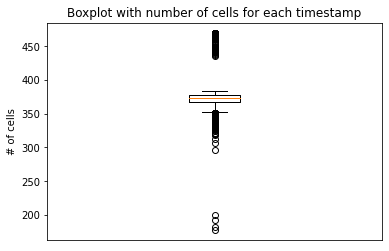

In [24]:
timestamps = []
num_cells_at_time = []
for timestamp, group in grouped_df:
    timestamps.append(timestamp)
    num_cells_at_time.append(len(group))

num_cell_df = pd.DataFrame({'timestamp': timestamps, 'num_cells': num_cells_at_time})
fig = px.line(num_cell_df, x="timestamp", y='num_cells', title='Number of cells for each timestamp')
fig.show()

plt.boxplot(num_cells_at_time);
plt.title('Boxplot with number of cells for each timestamp')
plt.ylabel('# of cells')
plt.xticks([], [])
plt.show()

## Aggregating cells within same sector

### For Hackaton data
The cell_name is of the form 'XX_ija', where:

- XX in {00,01,02,..,30} denotes the site the cell belongs to;
- i in {1,2,3} denotes the sector the cell belongs to;
- j in {1,2,...} denotes the carrier;
- a in {'Z','X','Y','W','V','R','Q','P'} denotes the technology and frequency of the cell based on the table below.

### For Original data
The cell_name is of the form: '{1char}{4digits}{1char}{2chars}', where:

- 1char is Area
- 4digits is range per Area
- 1char is System (frequency/technology)
- 2chars: 1st digit is carrier layer, starting from 1. 2nd digit is sector, range 0-9

In [25]:
df.head()

index       gid   site  sector  carrier  \
1623756  174448148   1257611  S4328       3        1   
4292561  460375129  12823075  S3375       1        1   
372752    40013610   7491870  S4097       2        1   
4321365  463458720   3081676  S1377       1        1   
252893    27104598   1251649  S3005       3        1   

                     period_start_time day_partition_key cell_hour tech  \
1623756  2019-11-03T00:00:00.000+01:00          20191103         0   3G   
4292561  2019-11-03T00:00:00.000+01:00          20191103         0   4G   
372752   2019-11-03T00:00:00.000+01:00          20191103         0   4G   
4321365  2019-11-03T00:00:00.000+01:00          20191103         0   4G   
252893   2019-11-03T00:00:00.000+01:00          20191103         0   3G   

         avail_period_duration  ...  msdr_denom  msdr_nom_d  msdr_nom_s  \
1623756                     60  ...      1573.0         3.0         3.0   
4292561                     60  ...      2513.0         0.0         0.0   
372752                      60  ...       865.0         0.0         0.0   
4321365                     60  ...      2960.0         0.0         0.0   
252893                      60  ...      1045.0         4.0         0.0   

         thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  impact_denom  \
1623756      4.463860e+05    3.442479e+06       1.0     0.0           NaN   
4292561      1.665642e+06    5.180661e+10      40.0     0.0           NaN   
372752       3.291992e+05    7.853588e+09      12.0     0.0           NaN   
4321365      1.027762e+06    2.054758e+10      10.0     0.0           NaN   
252893       1.149480e+05    4.516360e+05       0.0     0.0           NaN   

         impact_nom  timestamp  
1623756         NaN 2019-11-03  
4292561         NaN 2019-11-03  
372752          NaN 2019-11-03  
4321365         NaN 2019-11-03  
252893          NaN 2019-11-03  

[5 rows x 28 columns]

In [26]:
is_original_data = True
df2 = df.copy()

if not is_original_data:    
    df2['site'] = df2['cell_name'].apply(lambda s: int(s.split('_')[0]))
    df2['sector'] = df2['cell_name'].apply(lambda s: int(s.split('_')[1][0]))
    df2['carrier'] = df2['cell_name'].apply(lambda s: int(s.split('_')[1][1]))
    df2['tech'] = df2['cell_name'].apply(lambda s: s.split('_')[1][2])
df2.head()

index       gid   site  sector  carrier  \
1623756  174448148   1257611  S4328       3        1   
4292561  460375129  12823075  S3375       1        1   
372752    40013610   7491870  S4097       2        1   
4321365  463458720   3081676  S1377       1        1   
252893    27104598   1251649  S3005       3        1   

                     period_start_time day_partition_key cell_hour tech  \
1623756  2019-11-03T00:00:00.000+01:00          20191103         0   3G   
4292561  2019-11-03T00:00:00.000+01:00          20191103         0   4G   
372752   2019-11-03T00:00:00.000+01:00          20191103         0   4G   
4321365  2019-11-03T00:00:00.000+01:00          20191103         0   4G   
252893   2019-11-03T00:00:00.000+01:00          20191103         0   3G   

         avail_period_duration  ...  msdr_denom  msdr_nom_d  msdr_nom_s  \
1623756                     60  ...      1573.0         3.0         3.0   
4292561                     60  ...      2513.0         0.0         0.0   
372752                      60  ...       865.0         0.0         0.0   
4321365                     60  ...      2960.0         0.0         0.0   
252893                      60  ...      1045.0         4.0         0.0   

         thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  impact_denom  \
1623756      4.463860e+05    3.442479e+06       1.0     0.0           NaN   
4292561      1.665642e+06    5.180661e+10      40.0     0.0           NaN   
372752       3.291992e+05    7.853588e+09      12.0     0.0           NaN   
4321365      1.027762e+06    2.054758e+10      10.0     0.0           NaN   
252893       1.149480e+05    4.516360e+05       0.0     0.0           NaN   

         impact_nom  timestamp  
1623756         NaN 2019-11-03  
4292561         NaN 2019-11-03  
372752          NaN 2019-11-03  
4321365         NaN 2019-11-03  
252893          NaN 2019-11-03  

[5 rows x 28 columns]

### Fill NaNs of cells 

In [27]:
agg_df = df2.copy()
for c in nan_columns:
    if is_numeric_dtype(agg_df[c]):
        if c in ['thp_denom_tt_kpi', 'thp_nom_tt_kpi']:
            agg_func = 'mean'
        else:
            agg_func = 'median'
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site', 'sector', 'tech'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site', 'sector'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['site', 'sector'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['site'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df[c].median())

print(agg_df.isna().sum())
agg_df.head()

index                    0
gid                      0
site                     0
sector                   0
carrier                  0
period_start_time        0
day_partition_key        0
cell_hour                0
tech                     0
avail_period_duration    0
unavail_unplan_nom       0
unavail_unplan_denom     0
unavail_total_nom        0
unavail_total_denom      0
bandwidth                0
mcdr_denom               0
mcdr_nom_d               0
mcdr_nom_s               0
msdr_denom               0
msdr_nom_d               0
msdr_nom_s               0
thp_denom_tt_kpi         0
thp_nom_tt_kpi           0
ho_denom                 0
ho_nom                   0
impact_denom             0
impact_nom               0
timestamp                0
dtype: int64


index       gid   site  sector  carrier  \
1623756  174448148   1257611  S4328       3        1   
4292561  460375129  12823075  S3375       1        1   
372752    40013610   7491870  S4097       2        1   
4321365  463458720   3081676  S1377       1        1   
252893    27104598   1251649  S3005       3        1   

                     period_start_time day_partition_key cell_hour tech  \
1623756  2019-11-03T00:00:00.000+01:00          20191103         0   3G   
4292561  2019-11-03T00:00:00.000+01:00          20191103         0   4G   
372752   2019-11-03T00:00:00.000+01:00          20191103         0   4G   
4321365  2019-11-03T00:00:00.000+01:00          20191103         0   4G   
252893   2019-11-03T00:00:00.000+01:00          20191103         0   3G   

         avail_period_duration  ...  msdr_denom  msdr_nom_d  msdr_nom_s  \
1623756                     60  ...      1573.0         3.0         3.0   
4292561                     60  ...      2513.0         0.0         0.0   
372752                      60  ...       865.0         0.0         0.0   
4321365                     60  ...      2960.0         0.0         0.0   
252893                      60  ...      1045.0         4.0         0.0   

         thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  impact_denom  \
1623756      4.463860e+05    3.442479e+06       1.0     0.0         992.0   
4292561      1.665642e+06    5.180661e+10      40.0     0.0         389.0   
372752       3.291992e+05    7.853588e+09      12.0     0.0         311.0   
4321365      1.027762e+06    2.054758e+10      10.0     0.0         473.0   
252893       1.149480e+05    4.516360e+05       0.0     0.0        1529.0   

         impact_nom  timestamp  
1623756         3.0 2019-11-03  
4292561         1.0 2019-11-03  
372752          1.0 2019-11-03  
4321365         2.0 2019-11-03  
252893          8.0 2019-11-03  

[5 rows x 28 columns]

### Now aggregate across each sector

In [28]:
agg_df.columns

Index(['index', 'gid', 'site', 'sector', 'carrier', 'period_start_time',
       'day_partition_key', 'cell_hour', 'tech', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_d',
       'mcdr_nom_s', 'msdr_denom', 'msdr_nom_d', 'msdr_nom_s',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom', 'timestamp'],
      dtype='object')

In [32]:
agg_df['site'].nunique()

40

In [34]:
# To aggregate columns differently, pass this to the agg-function
#aggregate_methods = {
 #   'avail_period_duration': 'mean',
  #  'unavail_unplan_nom': 'mean',
   # 'unavail_unplan_denom': 'mean',
    #'unavail_total_nom': 'mean',
    #'unavail_total_denom': 'mean',
    #'bandwidth': 'mean'
#}

agg_df = agg_df.groupby(['timestamp', 'site', 'sector']).agg('mean').reset_index()
# Remove irrelevant columns
if 'gid' in agg_df.columns and 'carrier' in agg_df.columns:
    agg_df.drop(columns=['gid', 'carrier'], inplace=True)
agg_df[(agg_df['site'] == 'J1824') & (agg_df['sector'] == 1)].head() # Site in Aarhus
agg_df[(agg_df['site'] == 'S4328') & (agg_df['sector'] == 1)].head() # Site in Copenhagen

timestamp   site  sector         index  avail_period_duration  \
100 2019-11-03 00:00:00  S4328       1  3.189717e+08                   60.0   
213 2019-11-03 01:00:00  S4328       1  3.723811e+08                   60.0   
326 2019-11-03 02:00:00  S4328       1  2.254600e+08                   60.0   
439 2019-11-03 03:00:00  S4328       1  2.497938e+08                   60.0   
552 2019-11-03 04:00:00  S4328       1  2.528444e+08                   60.0   

     unavail_unplan_nom  unavail_unplan_denom  unavail_total_nom  \
100                 0.0                  60.0                0.0   
213                 0.0                  60.0                0.0   
326                 0.0                  60.0                0.0   
439                 0.0                  60.0                0.0   
552                 0.0                  60.0                0.0   

     unavail_total_denom  bandwidth  ...  mcdr_nom_s  msdr_denom  msdr_nom_d  \
100                 60.0  46.666667  ...         0.0  675.333333    1.333333   
213                 60.0  46.666667  ...         0.0  621.666667    1.333333   
326                 60.0  46.666667  ...         0.0  573.333333    2.000000   
439                 60.0  46.666667  ...         0.0  723.000000    1.333333   
552                 60.0  46.666667  ...         0.0  633.000000    0.666667   

     msdr_nom_s  thp_denom_tt_kpi  thp_nom_tt_kpi   ho_denom  ho_nom  \
100    2.000000      50885.810833    3.014534e+08  39.666667     0.0   
213    1.666667      33711.633333    4.060744e+08  38.666667     0.0   
326    0.666667      58477.133333    7.576768e+08  18.333333     0.0   
439    2.666667      17437.041667    1.436332e+08  17.000000     0.0   
552    2.000000      17949.581667    2.393294e+08  51.000000     0.0   

     impact_denom  impact_nom  
100         989.5         3.0  
213         989.5         3.0  
326         989.5         3.0  
439         989.5         3.0  
552         989.5         3.0  

[5 rows x 22 columns]

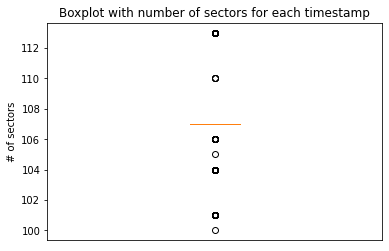

In [35]:
grouped_agg_df = agg_df.groupby(['timestamp'])
timestamps = []
num_sectors_at_time = []
for timestamp, group in grouped_agg_df:
    timestamps.append(timestamp)
    num_sectors_at_time.append(len(group))

num_sector_df = pd.DataFrame({'timestamp': timestamps, 'num_sectors': num_sectors_at_time})
fig = px.line(num_sector_df, x="timestamp", y='num_sectors', hover_data={"timestamp": "|%B %d. %H:%M, %Y"}, title='Number of sectors for each timestamp')
fig.show()


plt.boxplot(num_sectors_at_time);
plt.title('Boxplot with number of sectors for each timestamp')
plt.ylabel('# of sectors')
plt.xticks([], [])
plt.show()

### Visualizing the number of timetamps where the sectors has data

In [36]:
agg_df.head()

timestamp   site  sector         index  avail_period_duration  \
0 2019-11-03  S0142       1  3.070138e+08                   60.0   
1 2019-11-03  S0142       2  2.109583e+08                   60.0   
2 2019-11-03  S0142       3  2.279055e+08                   60.0   
3 2019-11-03  S0185       1  2.428523e+08                   60.0   
4 2019-11-03  S0185       2  2.910753e+08                   60.0   

   unavail_unplan_nom  unavail_unplan_denom  unavail_total_nom  \
0                 0.0                  60.0                0.0   
1                 0.0                  60.0                0.0   
2                 0.0                  60.0                0.0   
3                 0.0                  60.0                0.0   
4                 0.0                  60.0                0.0   

   unavail_total_denom  bandwidth  ...  mcdr_nom_s   msdr_denom  msdr_nom_d  \
0                 60.0  47.500000  ...         0.0  1546.750000    2.000000   
1                 60.0  47.500000  ...         0.0  1894.750000    3.750000   
2                 60.0  47.500000  ...         0.0   849.500000    0.500000   
3                 60.0  38.333333  ...         0.0   658.333333    0.333333   
4                 60.0  38.333333  ...         0.0  3739.166667    5.666667   

   msdr_nom_s  thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  \
0    1.750000      8.096668e+05    8.214178e+09     16.00    0.25   
1    0.750000      1.097278e+06    1.271708e+10     14.00    0.00   
2    0.000000      2.768270e+05    3.214117e+09      1.25    0.00   
3    0.000000      6.472090e+05    8.226060e+09      6.00    0.00   
4    0.666667      2.888192e+06    2.553508e+10     38.50    0.50   

   impact_denom  impact_nom  
0         580.5         6.0  
1         580.0         6.0  
2         579.0         6.0  
3        1195.0         6.0  
4        1196.0         6.0  

[5 rows x 22 columns]

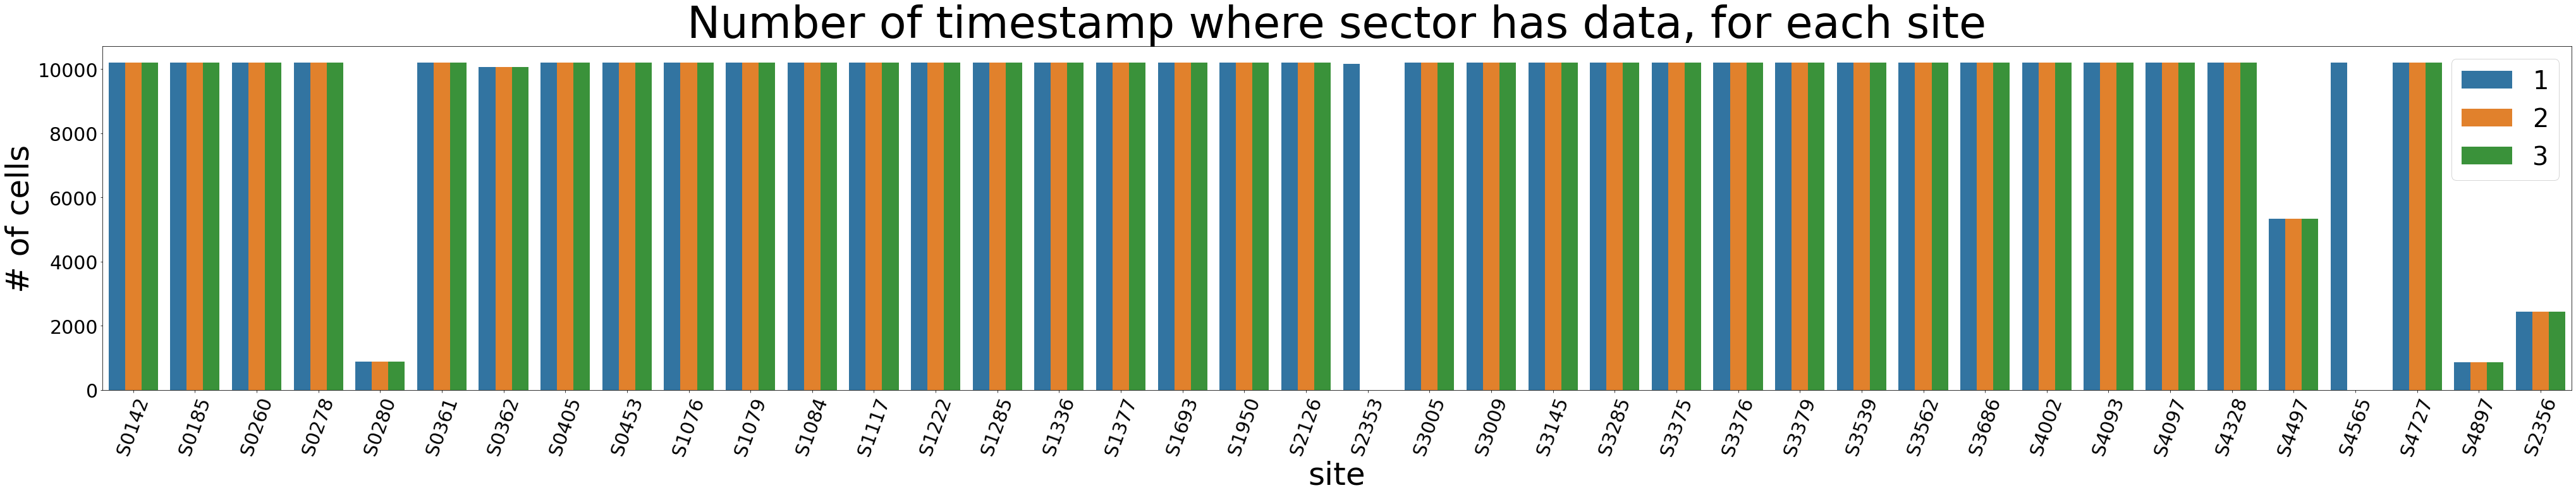

In [38]:
plt.figure(figsize=(70, 10))
ax = sns.countplot(x="site", hue="sector", data=agg_df)
plt.legend(loc='upper right', fontsize=40)
plt.xticks(rotation=70)
ax.set_ylabel('# of timestamps', fontsize=50)
ax.xaxis.label.set_size(50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of timestamp where sector has data, for each site', fontsize=70)
plt.show()

In [39]:
# Removing sites without exactly three sectors 
# agg_df = agg_df[~agg_df['site'].isin(['J2964', 'J4608', 'J5004', 'J4969', 'J8062'])] # This is for Aarhus data

agg_df = agg_df[~agg_df['site'].isin(['S0280', 'S2353', 'S4497', 'S4565', 'S4897', 'S2356'])] # This is for Copenhagen data

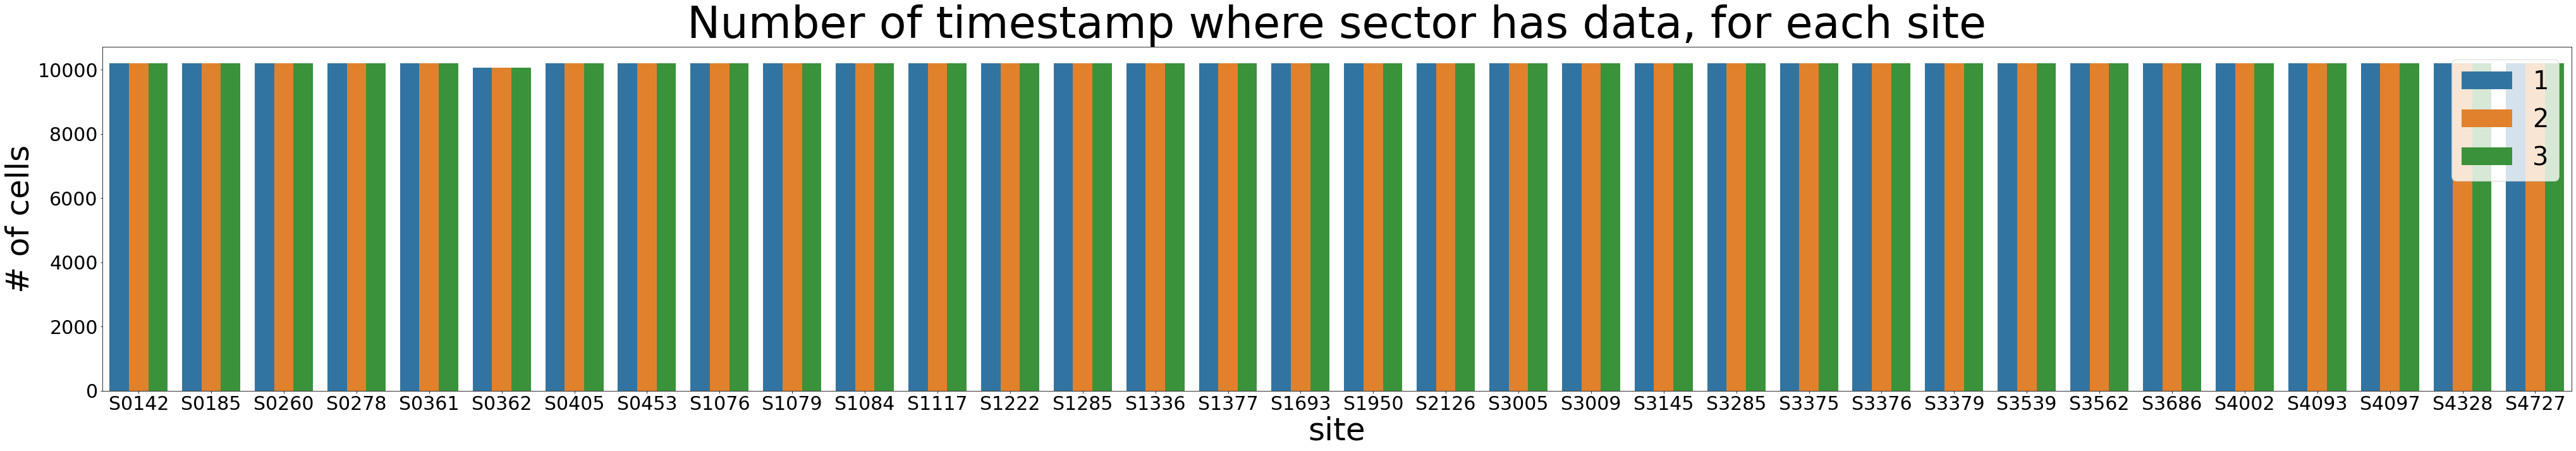

In [40]:
plt.figure(figsize=(70, 10))
ax = sns.countplot(x="site", hue="sector", data=agg_df)
plt.legend(loc='upper right', fontsize=40)
ax.set_ylabel('# of timestamps', fontsize=50)
ax.xaxis.label.set_size(50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of timestamp where sector has data, for each site', fontsize=70)
plt.show()

### Visualizing data for one of the sectors

In [41]:
def visualize_sector(df, site, sector, column):
    if sector is not None:
        sector_df = df[(df['site'] == site) & (df['sector'] == sector)]
    else:
        sector_df = df[(df['site'] == site)]
    fig = px.line(sector_df, x="timestamp", y=column)
    fig.show()

In [42]:
agg_df.columns

Index(['timestamp', 'site', 'sector', 'index', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_d',
       'mcdr_nom_s', 'msdr_denom', 'msdr_nom_d', 'msdr_nom_s',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom'],
      dtype='object')

In [77]:
visualize_sector(agg_df, 'S0142', 2, 'thp_denom_tt_kpi')

## Creating dataset 
In **agg_df**, each row corresponds to aggregated data from all cells within a sector, at a specific timestamp. However, not all sectors do have at least one active cell at all timestamps. If a sector contains no active cells for a timestamp, then a row for that sector at that timestamp does not exist. To make the resolution (every hour) and shape (there is a row for all sectors for all timestamps) consistent, we must insert rows. 

In [56]:
agg_df.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_d',
       'mcdr_nom_s', 'msdr_denom', 'msdr_nom_d', 'msdr_nom_s',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom'],
      dtype='object')

In [63]:
default_values = {
    'avail_period_duration': 60, # maybe exclude
    'unavail_unplan_nom': 0,  # maybe exclude
    'unavail_unplan_denom': 60, # maybe exclude
    'unavail_total_nom': 0, # maybe maybe exclude
    'unavail_total_denom': 60,# maybe maybe exclude
    'bandwidth': 0, # gets set to max of sector # maybe exclude
    'mcdr_denom': 0, 
    'mcdr_nom_s': 0,
    'mcdr_nom_d': 0,
    'msdr_denom': 0, 
    'msdr_nom_s': 0,
    'msdr_nom_d': 0,
    'thp_denom_tt_kpi': 0, # gets set to max of sector
    'thp_nom_tt_kpi': 0,
    'ho_denom': 0,
    'ho_nom': 0,
    'impact_denom': 0,
    'impact_nom': 0
}

# change thp, ho, msdr, mcdr to rates 

sector_bandwidth_max = agg_df.groupby(['site', 'sector']).agg('max')['bandwidth'].to_dict()
sector_thp_denom_max = agg_df.groupby(['site', 'sector']).agg('max')['thp_denom_tt_kpi'].to_dict()
# default_values_list = [default_values[c] for c in agg_df.columns[3:]]

In [64]:
is_present_set = set([tuple(x) for x in agg_df[['timestamp', 'site', 'sector']].values])

In [65]:
agg_df.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_d',
       'mcdr_nom_s', 'msdr_denom', 'msdr_nom_d', 'msdr_nom_s',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom'],
      dtype='object')

In [66]:
datetime_start = agg_df.head(1)['timestamp'].iloc[0]
datetime_end = agg_df.tail(1)['timestamp'].iloc[0]

all_timestamps = pd.date_range(datetime_start, datetime_end, freq="H")
all_sites = agg_df['site'].unique()
all_sectors = agg_df['sector'].unique()

rows_to_add = []
for timestamp in tqdm(all_timestamps):
    for site in all_sites:
        for sector in all_sectors:
            if (timestamp, site, sector) not in is_present_set:
                bandwidth_default = sector_bandwidth_max[(site, sector)]
                thp_default = sector_thp_denom_max[(site, sector)]
                default_values['bandwidth'] = bandwidth_default
                default_values['thp_denom_tt_kpi'] = thp_default
                default_values_list = [default_values[c] for c in agg_df.columns[3:]]
                row_insert = [timestamp, site, sector]
                row_insert.extend(default_values_list)
                rows_to_add.append(row_insert)

In [67]:
rows_to_add_df = pd.DataFrame(rows_to_add, columns=agg_df.columns)

In [68]:
agg_df_filled = agg_df.append(rows_to_add_df)
agg_df_filled = agg_df_filled.sort_values(by=['timestamp', 'site', 'sector'])

In [71]:
print(agg_df['site'].nunique())
print(agg_df_filled.shape)
agg_df_filled.head(6)

34
(1040400, 21)


timestamp   site  sector  avail_period_duration  unavail_unplan_nom  \
0 2019-11-03  S0142       1                   60.0                 0.0   
1 2019-11-03  S0142       2                   60.0                 0.0   
2 2019-11-03  S0142       3                   60.0                 0.0   
3 2019-11-03  S0185       1                   60.0                 0.0   
4 2019-11-03  S0185       2                   60.0                 0.0   
5 2019-11-03  S0185       3                   60.0                 0.0   

   unavail_unplan_denom  unavail_total_nom  unavail_total_denom  bandwidth  \
0                  60.0                0.0                 60.0  47.500000   
1                  60.0                0.0                 60.0  47.500000   
2                  60.0                0.0                 60.0  47.500000   
3                  60.0                0.0                 60.0  38.333333   
4                  60.0                0.0                 60.0  38.333333   
5                  60.0                0.0                 60.0  38.333333   

   mcdr_denom  ...  mcdr_nom_s   msdr_denom  msdr_nom_d  msdr_nom_s  \
0    8.250000  ...         0.0  1546.750000    2.000000    1.750000   
1   26.250000  ...         0.0  1894.750000    3.750000    0.750000   
2    3.250000  ...         0.0   849.500000    0.500000    0.000000   
3    4.000000  ...         0.0   658.333333    0.333333    0.000000   
4   29.833333  ...         0.0  3739.166667    5.666667    0.666667   
5   14.666667  ...         0.0  3049.833333    5.166667    2.000000   

   thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom    ho_nom  impact_denom  \
0      8.096668e+05    8.214178e+09     16.00  0.250000         580.5   
1      1.097278e+06    1.271708e+10     14.00  0.000000         580.0   
2      2.768270e+05    3.214117e+09      1.25  0.000000         579.0   
3      6.472090e+05    8.226060e+09      6.00  0.000000        1195.0   
4      2.888192e+06    2.553508e+10     38.50  0.500000        1196.0   
5      2.930025e+06    1.275296e+10     66.50  0.166667        1195.0   

   impact_nom  
0         6.0  
1         6.0  
2         6.0  
3         6.0  
4         6.0  
5         6.0  

[6 rows x 21 columns]

#### Check that new dataframe now has constant number of sectors for each timestamp

In [70]:
grouped_agg_df = agg_df_filled.groupby(['timestamp'])
timestamps = []
num_sectors_at_time = []
for timestamp, group in grouped_agg_df:
    timestamps.append(timestamp)
    num_sectors_at_time.append(len(group))

num_sector_df = pd.DataFrame({'timestamp': timestamps, 'num_sectors': num_sectors_at_time})
fig = px.line(num_sector_df, x="timestamp", y='num_sectors', hover_data={"timestamp": "|%B %d. %H:%M, %Y"}, title='Number of sectors for each timestamp')
fig.show()

#### Visualize column again

In [72]:
agg_df_filled.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_d',
       'mcdr_nom_s', 'msdr_denom', 'msdr_nom_d', 'msdr_nom_s',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom'],
      dtype='object')

In [84]:
# Cols to keep:
cols_to_keep = ['timestamp', 'site', 'sector', 'avail_period_duration', 'unavail_unplan_nom', 'unavail_unplan_denom', 'mcdr_denom', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d', 'ho_denom', 'ho_nom', 'impact_denom', 'impact_nom']

In [98]:
visualize_sector(agg_df, 'S0142', 1, 'mcdr_denom')

# Group Sectors Into the Final Dataset
## Alternative 1: 
Group the data to get a series of graph signals with shape: (# of timestamps, # of sectors, # of features), see figure below: <img src="https://i.imgur.com/1izToWi.png" width=750 height=750 />.

In [99]:
def save_metadata(df, path):
    metadata = {
    'start': str(df.head(1)['timestamp'].iloc[0]),
    'end': str(df.tail(1)['timestamp'].iloc[0]),
    'resolution_minutes': (df.iloc[1, 0] - df.iloc[0, 0]).seconds / 60,
    'columns': df.columns.tolist()}
    
    with open(path, 'w') as file:
        json.dump(metadata, file, indent=2)

In [51]:
grouped_agg_df = agg_df_filled.groupby(['timestamp'])
graph_signals = []

for timestamp, group in tqdm(grouped_agg_df):
    graph_signals.append(group)

graph_signals = np.array(graph_signals)

In [53]:
print(graph_signals.shape)
save = False
save_path = '../datasets/telenor/'
os.makedirs(save_path, exist_ok=True)

if save:
    save_metadata(agg_df_filled, f'{save_path}/graph_signals_metadata.txt') 
    np.save(f'{save_path}/graph_signals.npy', graph_signals)

(8528, 81, 19)


## Alternative 2: 
'Augment' each sector with the sectors of the same site. 

In [100]:
print(agg_df_filled.shape)
agg_df_filled.columns

(1040400, 21)


Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_d',
       'mcdr_nom_s', 'msdr_denom', 'msdr_nom_d', 'msdr_nom_s',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom'],
      dtype='object')

In [101]:
# Reduce number of cols
agg_df_filled = agg_df_filled[cols_to_keep]
agg_df_filled.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'mcdr_denom',
       'msdr_denom', 'msdr_nom_s', 'msdr_nom_d', 'ho_denom', 'ho_nom',
       'impact_denom', 'impact_nom'],
      dtype='object')

In [111]:
agg_df_filled.head()

timestamp   site  sector  avail_period_duration  unavail_unplan_nom  \
0 2019-11-03  S0142       1                   60.0                 0.0   
1 2019-11-03  S0142       2                   60.0                 0.0   
2 2019-11-03  S0142       3                   60.0                 0.0   
3 2019-11-03  S0185       1                   60.0                 0.0   
4 2019-11-03  S0185       2                   60.0                 0.0   

   unavail_unplan_denom  mcdr_denom   msdr_denom  msdr_nom_s  msdr_nom_d  \
0                  60.0    8.250000  1546.750000    1.750000    2.000000   
1                  60.0   26.250000  1894.750000    0.750000    3.750000   
2                  60.0    3.250000   849.500000    0.000000    0.500000   
3                  60.0    4.000000   658.333333    0.000000    0.333333   
4                  60.0   29.833333  3739.166667    0.666667    5.666667   

   ho_denom  ho_nom  impact_denom  impact_nom  
0     16.00    0.25         580.5         6.0  
1     14.00    0.00         580.0         6.0  
2      1.25    0.00         579.0         6.0  
3      6.00    0.00        1195.0         6.0  
4     38.50    0.50        1196.0         6.0

In [102]:
site_grouped = agg_df_filled.groupby(['site', 'timestamp'])
sectors_df = []

for (site, timestamp), group in tqdm(site_grouped):
    # Merge the three sectors
    group = group.drop(columns=['sector'])
    s1, s2, s3 = group.iloc[0, :], group.iloc[1, :], group.iloc[2, :]

    sectors_comb = {}
    sectors_comb['timestamp'] =  str(timestamp)
    sectors_comb['site'] = site

    for i, s in enumerate([s1, s2, s3], start=1):
        for c in group.columns[2:]:
            sectors_comb[f'{c}_{i}'] = s[c]
    
    sectors_df.append(sectors_comb)

sectors_df = pd.DataFrame(sectors_df, index=range(len(sectors_df)))
sectors_df['timestamp'] = pd.to_datetime(sectors_df['timestamp'])
sectors_df = sectors_df.sort_values(by=['site', 'timestamp'])
display(sectors_df.head())

timestamp   site  avail_period_duration_1  unavail_unplan_nom_1  \
0 2019-11-03 00:00:00  S0142                     60.0                   0.0   
1 2019-11-03 01:00:00  S0142                     60.0                   0.0   
2 2019-11-03 02:00:00  S0142                     60.0                   0.0   
3 2019-11-03 03:00:00  S0142                     60.0                   0.0   
4 2019-11-03 04:00:00  S0142                     60.0                   0.0   

   unavail_unplan_denom_1  mcdr_denom_1  msdr_denom_1  msdr_nom_s_1  \
0                    60.0          8.25       1546.75          1.75   
1                    60.0          8.00       1345.75          0.00   
2                    60.0          3.50       1453.50          0.50   
3                    60.0          3.25       1506.50          0.50   
4                    60.0          3.00       1444.75          0.00   

   msdr_nom_d_1  ho_denom_1  ...  unavail_unplan_nom_3  \
0          2.00       16.00  ...                   0.0   
1          0.50        6.00  ...                   0.0   
2          0.50        5.50  ...                   0.0   
3          1.75        3.00  ...                   0.0   
4          2.00        2.25  ...                   0.0   

   unavail_unplan_denom_3  mcdr_denom_3  msdr_denom_3  msdr_nom_s_3  \
0                    60.0          3.25         849.5           0.0   
1                    60.0          3.75         769.0           0.0   
2                    60.0          2.50         861.0           1.0   
3                    60.0          1.00         769.0           0.0   
4                    60.0          0.50         629.0           1.5   

   msdr_nom_d_3  ho_denom_3  ho_nom_3  impact_denom_3  impact_nom_3  
0          0.50        1.25       0.0           579.0           6.0  
1          0.50        5.75       0.0           579.0           6.0  
2          1.25        2.25       0.0           579.0           6.0  
3          1.25        3.75       0.0           579.0           6.0  
4          4.00        0.25       0.0           579.0           6.0  

[5 rows x 35 columns]

In [110]:
visualize_sector(sectors_df, 'S0142', None, 'impact_denom_1')

In [108]:
# Saving site data
print(sectors_df.shape)
save = True
save_path = '../datasets/telenor/copenhagen/site_data'
os.makedirs(save_path, exist_ok=True)
if save:
    save_metadata(sectors_df, f'{save_path}/metadata.txt') 
    grouped_sectors_df = sectors_df.groupby('site')
    for site, group in grouped_sectors_df:
        np.save(f'{save_path}/{site}.npy', group.values)

(346800, 35)


In [117]:
# Saving sector data
save_path = '../datasets/telenor/copenhagen/sector_data'
os.makedirs(save_path, exist_ok=True)
sector_grouped = agg_df_filled.groupby(['site', 'sector'])
for (site, sector), group in sector_grouped:
    np.save(f'{save_path}/{site}-{sector}.npy', group.values)